# Web Scraping and Analytics for Playstation and Xbox  Released Games

## Importing the Libraries

In [1]:
import requests # Importing requests to perform a request and response and get the html data from the website
from bs4 import BeautifulSoup # Importing BeautifulSoup to perform html scraping
import pandas as pd # Importing pandas to store the data in a dataframe for further processing 
from tqdm import tqdm  # Import the tqdm to show progress in for for loops

## Web Scraping

### Selecting Playstation and Xbox consoles

The general steps to performing web scraping are:

 1. Define the URL
 2. Request a response from the URL and verify the code
 3. Define the content of the response in a variable (usually 'html')
 4. Define a BeautifulSoup instance
 5. Utilize manual inspection and find_all function to scrap through the data
 6. Create a URL for the scrape process


In [2]:
# URL of the website to scrape
url = "https://www.vgchartz.com/gamedb/games.php"

# Define the response and print it to confirm webage retreival

response = requests.get(url)
print(response.status_code)

200


In [3]:
# Parse the HTML website in preparation to scrape the data

html = response.content
soup = BeautifulSoup(html, 'html.parser')

In [4]:
# This code is searching for a < select > element in the HTML document with the attribute name set to 'console', meaning it's looking for values in the console drop-down menu
# The "console" attribute was found by inspecting the website, below a screenshot:

console_select = soup.find('select', {'name': 'console'})

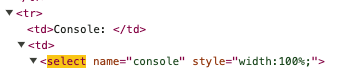

In [5]:
# Here we can see that we have all the values of the consoles in the "console_select" element. 

if console_select:
    # Loop through the option elements
    for option in console_select.find_all('option'):
        # Print the value attribute of each option
        print(option.get_text())

-
3DO Interactive Multiplayer
Acorn Electron
All
Amiga
Amiga CD32
Amstrad CPC
Android
Apple II
Arcade
Atari 2600
Atari 5200
Atari 7800
Atari Jaguar
Atari Lynx
Atari ST
BBC Micro
Browser
CD-i
ColecoVision
Commodore 128
Commodore 64
DSi Ware
Fairchild Channel F
Famicom Disk System
FM Towns
Game Boy
Game Boy Advance
Game Boy Color
GameCube
GameGear
Gizmondo
HTC Vive
Intellivision
iOS
iQue
Linux
Mac OS X
Magnavox Odyssey
Microsoft Windows
MS-DOS
MSX
N-Gage
Neo Geo
Neo Geo X
Nintendo 2DS
Nintendo 3DS
Nintendo 64
Nintendo DS
Nintendo DSi
Nintendo Entertainment System
Nintendo Switch
Nvidia Shield
Oculus Rift
Ouya
PC-FX
PCE
PlayStation
PlayStation 2
PlayStation 3
PlayStation 4
PlayStation 5
PlayStation Network
PlayStation Portable
PlayStation Vita
Playstation VR
Sega 32X
Sega CD
Sega Dreamcast
Sega Genesis
Sega Master System
Sega Saturn
Series
Standard Mobile
Super Famicom
Super Nintendo Entertainment System
TurboGrafx-16
Unknown
Virtual Boy
Virtual Console
Wii
Wii U
WiiWare
Windows Phone
Won

In [6]:
# We need to extract the text and the value pairs for each xbox and playstation options
# I will create a dictionary comrehension to extract the options

if console_select:
    # Create a dictionary comprehension to extract the options starting with 'xbox' or 'playstation'
    desired_consoles = {option.get_text(): [option.get('value'), 1] 
                       for option in console_select.find_all('option') 
                       if option.get('value') and (option.get_text().lower().startswith('xbox') or option.get_text().lower().startswith('playstation'))}

    print(desired_consoles)

{'PlayStation': ['PS', 1], 'PlayStation 2': ['PS2', 1], 'PlayStation 3': ['PS3', 1], 'PlayStation 4': ['PS4', 1], 'PlayStation 5': ['PS5', 1], 'PlayStation Network': ['PSN', 1], 'PlayStation Portable': ['PSP', 1], 'PlayStation Vita': ['PSV', 1], 'Playstation VR': ['PVR', 1], 'Xbox': ['XB', 1], 'Xbox 360': ['X360', 1], 'XBox Live': ['XBL', 1], 'Xbox One': ['XOne', 1], 'Xbox Series': ['XS', 1]}


In [7]:
## Here I am creating a output text that will look like a dictionary
## This way I can just copy the code in the box below to get the console selection I want

print("Desired_Consoles = {")
for key, value in desired_consoles.items():
    print(f'"{key}"'.ljust(40), ':', value,",")

print("}")

Desired_Consoles = {
"PlayStation"                            : ['PS', 1] ,
"PlayStation 2"                          : ['PS2', 1] ,
"PlayStation 3"                          : ['PS3', 1] ,
"PlayStation 4"                          : ['PS4', 1] ,
"PlayStation 5"                          : ['PS5', 1] ,
"PlayStation Network"                    : ['PSN', 1] ,
"PlayStation Portable"                   : ['PSP', 1] ,
"PlayStation Vita"                       : ['PSV', 1] ,
"Playstation VR"                         : ['PVR', 1] ,
"Xbox"                                   : ['XB', 1] ,
"Xbox 360"                               : ['X360', 1] ,
"XBox Live"                              : ['XBL', 1] ,
"Xbox One"                               : ['XOne', 1] ,
"Xbox Series"                            : ['XS', 1] ,
}


### Defining Scrape Parameters and Scrape URL

When a search is performed on the website, the parameters of the search are defined in the URL, we will need to pre-specify those parameters to successfully pull the correct view

In [8]:
# Find all the parameters that will define the view of the website:
# I created this list to ensure correctly spelling in defining parameters

list_of_element_types = ['input', 'select']

for element_type in list_of_element_types:
    # Find elements of the current type
    if element_type == 'input':
        # For input elements, filter by type
        element_elements = soup.find_all(element_type, {'type': ['text', 'checkbox']})
    else:
        # For select elements, just find all select elements
        element_elements = soup.find_all(element_type)
    
    # Extract and print the name of each element
    for element in element_elements:
        element_name = element.get('name')
        if element_name:
            print(f"{element_type.capitalize()} Element Name:", element_name)


Input Element Name: l_username
Input Element Name: q
Input Element Name: name
Input Element Name: keyword
Input Element Name: developer
Input Element Name: publisher
Input Element Name: showtotalsales
Input Element Name: showpublisher
Input Element Name: showvgchartzscore
Input Element Name: shownasales
Input Element Name: showdeveloper
Input Element Name: showcriticscore
Input Element Name: showpalsales
Input Element Name: showreleasedate
Input Element Name: showuserscore
Input Element Name: showjapansales
Input Element Name: showlastupdate
Input Element Name: showothersales
Input Element Name: showshipped
Select Element Name: console
Select Element Name: region
Select Element Name: goty_year
Select Element Name: genre
Select Element Name: boxart
Select Element Name: banner
Select Element Name: ownership
Select Element Name: showmultiplat
Select Element Name: results


In [9]:
def open_url(system_desired):
    '''
    Here we will create the URL for the scrape process. You may want to change some parameters if wanted
    
    '''
    base_url = "https://www.vgchartz.com/games/games.php?"
    params = {
        'name': '',
        'keyword': '',
        'console': '',  # Placeholder for the console name
        'region': 'All',
        'developer': '',
        'publisher': '',
        'goty_year': '',
        'genre': '',
        'boxart': 'Both',
        'banner': 'Both',
        'ownership': 'Both',
        'showmultiplat': 'Yes',
        'results': '100000',         ## put a huge value here to get all the results in one page
        'order': 'TotalShipped',
        'showtotalsales': '1',
        'showpublisher': '0',
        'showvgchartzscore': '0',
        'shownasales': '1',
        'showdeveloper': '0',
        'showcriticscore': '0',
        'showpalsales': '1',
        'showreleasedate': '1',
        'showuserscore': '0',
        'showjapansales': '1',
        'showlastupdate': '0',
        'showothersales': '1',
        'showshipped': '1'
    }

    params['console'] = system_desired  # Set the console parameter
    console_url = base_url + '&'.join([f"{k}={v}" for k, v in params.items()])
    response = requests.get(console_url)
    html = response.content
    soup = BeautifulSoup(html, 'html.parser')
    games_table_in = soup.find('div', id='generalBody')
    rows_in = games_table_in.find_all('tr', style=True)  # Retrieve all the rows first to count them

    return rows_in


### Scraping The Date

In [13]:
games_data = []
# Use tqdm to wrap the iteration and provide a progress bar

#For each console in our desired_console list
for console in tqdm(desired_consoles.keys(), desc="looking in systems", unit = "system"):
    # we check if the user selected "1" (as in "I want to scrape data from this console")
    if desired_consoles[console][-1] == 1:
        #we open the url for the console
        rows = open_url(desired_consoles[console][0])
        #and download every row data
        for game_row in tqdm(rows, desc="Scraping games for "+ console , unit="row"):
            cells = game_row.find_all('td')
            system_image = cells[3].find('img')  # Find the <img> tag within the System cell
            system = system_image['alt'] if system_image and 'alt' in system_image.attrs else 'No system info'  # Get the alt text or a default
            game_image_url = cells[1].find('img')['src'] if cells[1].find('img') else 'N/A'

            if len(cells) > 1:  # This checks if the row is not a header or empty
                game_info = {
                    'Game Name': cells[2].get_text(strip=True),
                    'Image_URL': "https://www.vgchartz.com"+game_image_url,
                    'System': system,
                    'Total Shipped': cells[4].get_text(strip=True),
                    'Total Sales': cells[5].get_text(strip=True),
                    'NA Sales': cells[6].get_text(strip=True),
                    'PAL Sales': cells[7].get_text(strip=True),  # Adjust if the index is different
                    'Japan Sales': cells[8].get_text(strip=True),
                    'Other Sales': cells[9].get_text(strip=True),
                    'Release Date': cells[10].get_text(strip=True)
                }
                games_data.append(game_info)

Scraping games for PlayStation Vita: 100%|██████████| 1105/1105 [00:00<00:00, 29175.70row/s]
Scraping games for Playstation VR: 0row [00:00, ?row/s]  9.08s/system]
looking in systems: 100%|██████████| 14/14 [02:11<00:00,  9.42s/system]
